<a href="https://colab.research.google.com/github/fulasho/Predictive-Analytics/blob/main/Linear_Regression_Visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from time import sleep

In [ ]:
x = np.random.rand(500)
x[:5]

array([0.42867872, 0.60876857, 0.77504862, 0.79677296, 0.82401443])

In [ ]:
m = 2 # slope or weight
c = 3 # coffecient or bias

In [ ]:
noise = np.random.randn(500)/4
noise[:5]

array([-0.09433163, -0.11179757,  0.36221014,  0.35921521, -0.1789633 ])

In [ ]:
# Equation of the line y = mx + c
y = x * m + c + noise
y[:5]

array([3.76302581, 4.10573958, 4.91230739, 4.95276114, 4.46906556])

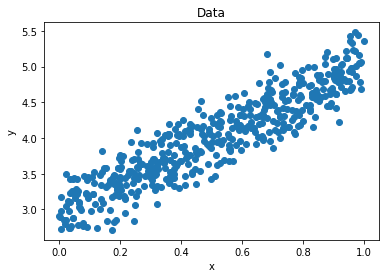

In [ ]:
#Visualise Our data
plt.scatter(x,y)
plt.title("Data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)
print(inputs[:5])
print(targets[:5])

tensor([0.4287, 0.6088, 0.7750, 0.7968, 0.8240], dtype=torch.float64)
tensor([3.7630, 4.1057, 4.9123, 4.9528, 4.4691], dtype=torch.float64)


In [ ]:
# Changing the data type to float32 as our model accepts float32 data type
inputs = inputs.type(torch.float32) 
targets = targets.type(torch.float32)

In [ ]:
# reshaping our data into n-rows and 1 columns. Model takes 2D array as an input
inputs = inputs.reshape(-1,1)
targets = targets.reshape(-1,1)


In [ ]:
print(targets[:5])

tensor([[3.7630],
        [4.1057],
        [4.9123],
        [4.9528],
        [4.4691]])


In [ ]:
# Define linear regression model
model = nn.Linear(1, 1) # (no. of input features, no. of output features)
print(model.weight) # Weight of the model
print(model.bias) # Bias of the model

Parameter containing:
tensor([[-0.0394]], requires_grad=True)
Parameter containing:
tensor([-0.0866], requires_grad=True)


In [ ]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.0394]], requires_grad=True), Parameter containing:
 tensor([-0.0866], requires_grad=True)]

In [ ]:
# Define loss function
import torch.nn.functional as F

loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(17.3439, grad_fn=<MseLossBackward0>)


In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr --> learning rate

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt,inputs, targets):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb,yb in zip(inputs, targets):
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
            
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            preds_ = model(inputs)
            plt.scatter(inputs,targets, label="Data")
            plt.plot(inputs,preds_.detach().numpy(),"r-", label="Prediction")
            plt.title('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            plt.legend()
            #plt.savefig("lr_images_final/{}.png".format(epoch+1))
            plt.show()
            sleep(.2)


Epoch [10/310], Loss: 9.3012


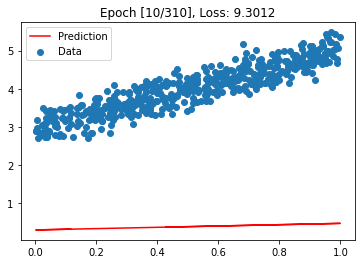

Epoch [20/310], Loss: 7.2265


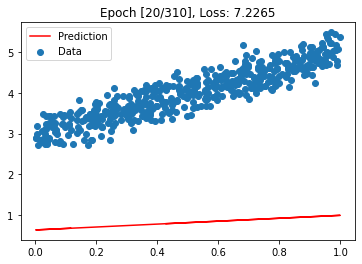

Epoch [30/310], Loss: 5.6166


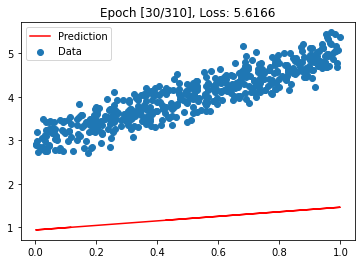

Epoch [40/310], Loss: 4.3673


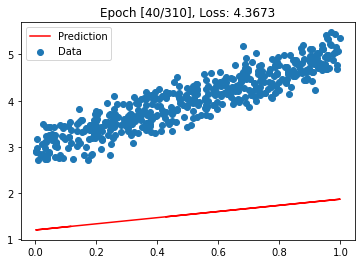

Epoch [50/310], Loss: 3.3977


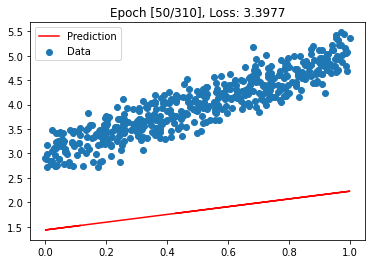

Epoch [60/310], Loss: 2.6449


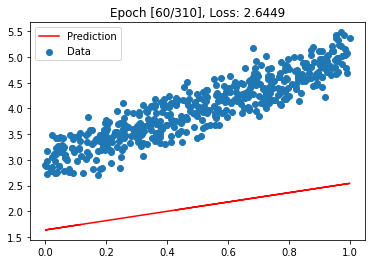

Epoch [70/310], Loss: 2.0602


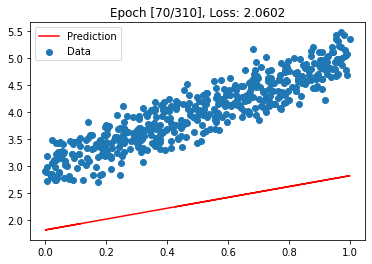

Epoch [80/310], Loss: 1.6061


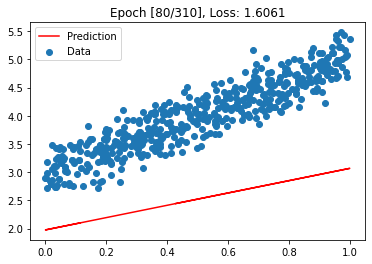

Epoch [90/310], Loss: 1.2533


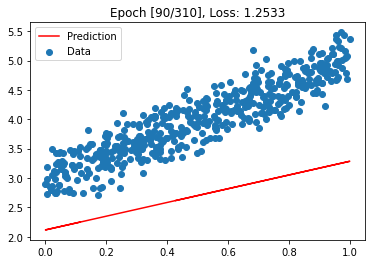

Epoch [100/310], Loss: 0.9789


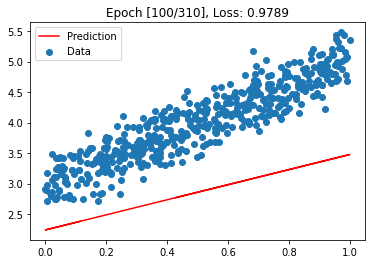

Epoch [110/310], Loss: 0.7656


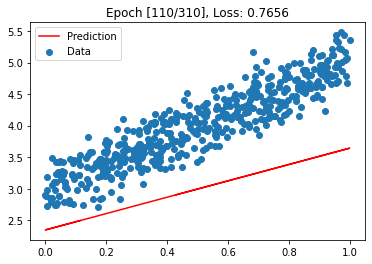

Epoch [120/310], Loss: 0.5995


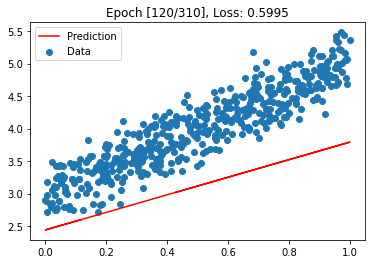

Epoch [130/310], Loss: 0.4703


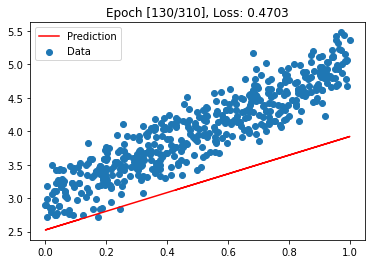

Epoch [140/310], Loss: 0.3695


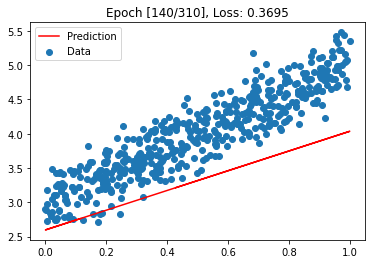

Epoch [150/310], Loss: 0.2910


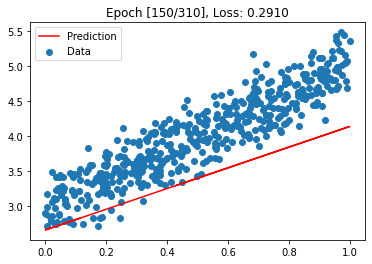

Epoch [160/310], Loss: 0.2297


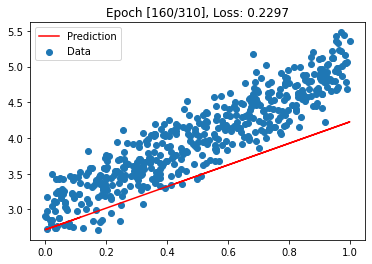

Epoch [170/310], Loss: 0.1818


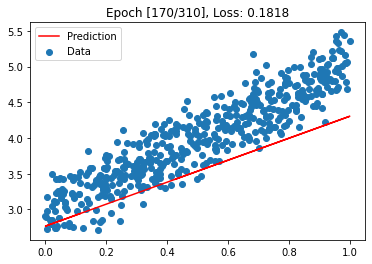

Epoch [180/310], Loss: 0.1443


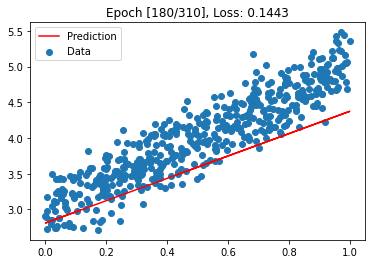

Epoch [190/310], Loss: 0.1149


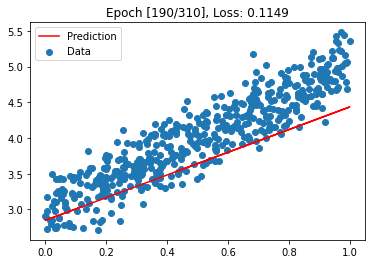

Epoch [200/310], Loss: 0.0919


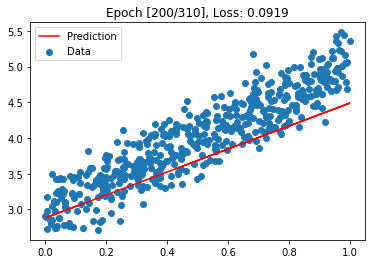

Epoch [210/310], Loss: 0.0738


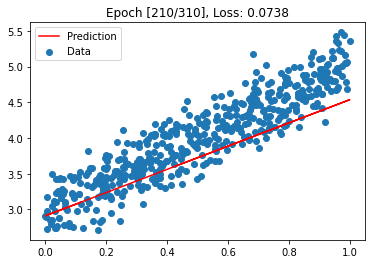

Epoch [220/310], Loss: 0.0595


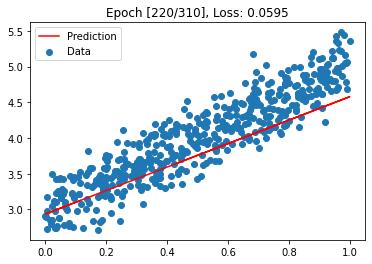

Epoch [230/310], Loss: 0.0483


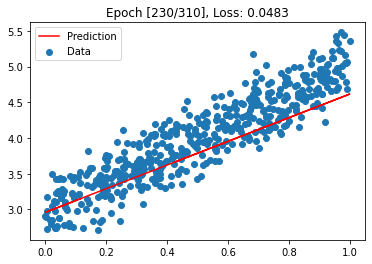

Epoch [240/310], Loss: 0.0394


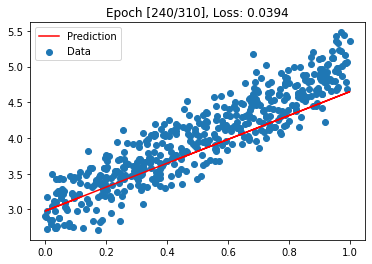

Epoch [250/310], Loss: 0.0323


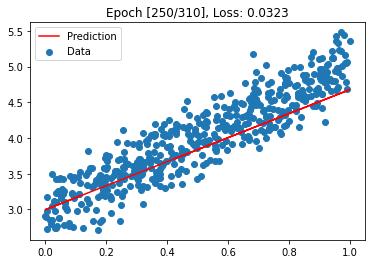

Epoch [260/310], Loss: 0.0267


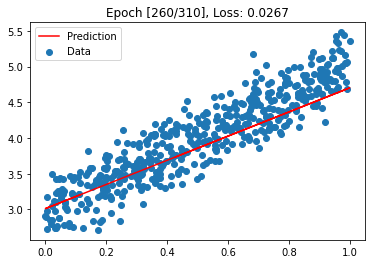

Epoch [270/310], Loss: 0.0222


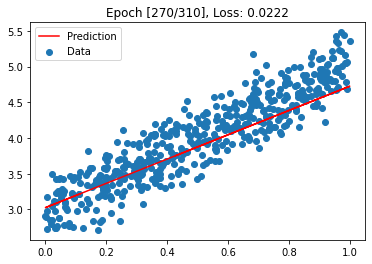

Epoch [280/310], Loss: 0.0187


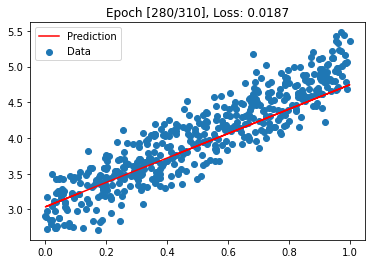

Epoch [290/310], Loss: 0.0158


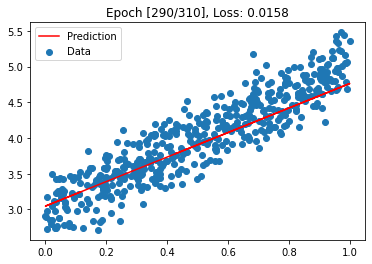

Epoch [300/310], Loss: 0.0135


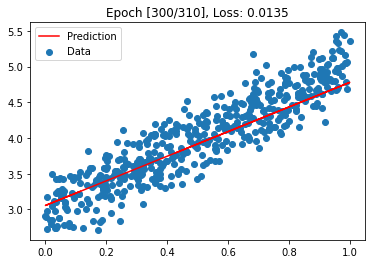

Epoch [310/310], Loss: 0.0116


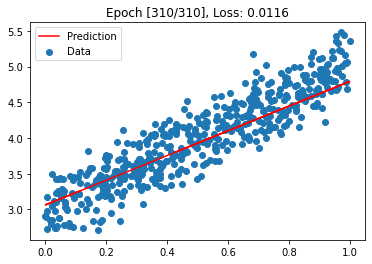

In [ ]:
fit(310, model, loss_fn, opt, inputs, targets, )

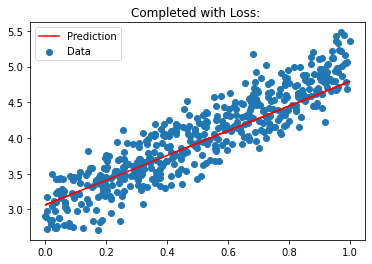

In [ ]:
preds = model(inputs)
plt.scatter(inputs,targets, label="Data")
plt.plot(inputs,preds.detach().numpy(),"r-", label="Prediction")
plt.title('Completed with Loss: ')
plt.legend()
plt.show()